In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp
from statsmodels.stats.power import tt_ind_solve_power
import warnings
warnings.filterwarnings("ignore")

# T test
A T test is inferentiqal statistics which is used to determine if there is a significant difference between means of two groups which may be related in certain features.

T-test has 2 types

1. One sampled t test
2. Two sampled t test

t=(sample mean - population mean) / standard error

In [2]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [3]:
#lets take sample
sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample

array([17, 43, 24, 17, 17, 30, 43, 19, 20, 16])

In [4]:
from scipy.stats import ttest_1samp

In [5]:
ttest,p_value=ttest_1samp(age_sample,30)

In [6]:
print(p_value)

0.1408020324062689


In [7]:
if p_value<0.05:
  print("We are rejecting null hypothesis")
else:
  print("We are accepting null hypothesis")

We are accepting null hypothesis


In [9]:
df=pd.read_excel("Datasets/Result.xlsx")
df

,Roll No,Name,Sub1,Sub2,Sub3,Total,Result
0,101,Akash,45,45,45,135,P
1,102,Manoj,35,45,42,122,P
2,103,Mrunal,29,26,30,85,P
3,104,Saurabh,38,35,29,102,P
4,105,Ashish,41,40,34,115,P
5,106,Sudhir,46,62,41,149,P
6,107,Ria,29,48,27,104,P
7,108,Prathana,43,33,33,109,P
8,109,Mihika,37,30,38,105,P
9,110,Shaurya,33,31,41,105,P


In [10]:
df.describe()

,Roll No,Sub1,Sub2,Sub3,Total
count,10.00000,10.000000,10.000000,10.000000,10.000000
mean,105.50000,37.600000,39.500000,36.000000,113.100000
std,3.02765,6.168018,10.783217,6.236096,18.241893
min,101.00000,29.000000,26.000000,27.000000,85.000000
25%,103.25000,33.500000,31.500000,30.750000,104.250000
50%,105.50000,37.500000,37.500000,36.000000,107.000000
75%,107.75000,42.500000,45.000000,41.000000,120.250000
max,110.00000,46.000000,62.000000,45.000000,149.000000


One way Hypothesis

In [11]:
#One way Hypothesis

Ho="mu <= 113"
Ha="mu > 113"    #alternate hypothesis
al=0.05          #ALPHA VALUE
#mu -> mean
mu=113
#tail type
tt=1
#data
marks=df["Total"].values
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu <= 113
Ha: mu > 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [12]:
ts, pv = ttest_1samp(marks,mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv=pv
t1pv=pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.017335249305284756
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [13]:
if tt==1:
  if t1pv < al:
    print("Null Hypothesis: Rejected")
    print("Conclusion:",Ha)
  else:
    print("Null Hypothesis: Not Rejected")
    print("Conclusion:",Ho)
else:
  if t2pv < al/2:
    print("Null Hypothesis: Rejected")
    print("Conclusion:",Ha)
  else:
    print("Null Hypothesis: Not Rejected")
    print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu <= 113


Two way hypothesis

In [14]:
#problem : check if the total mean marks = 113
#Test: One sample mean without std dev

#null hyp
Ho="mu = 113"
Ha="mu =! 113"    #alternate hypothesis
al=0.05          #ALPHA VALUE
#mu -> mean
mu=113
#tail type
tt=2
#data
marks=df["Total"].values
print("Ho:", Ho)
print("Ha:", Ha)
print("al:", al)
print("mu:", mu)
print(marks)
print("")

Ho: mu = 113
Ha: mu =! 113
al: 0.05
mu: 113
[135 122  85 102 115 149 104 109 105 105]



In [15]:
ts, pv = ttest_1samp(marks,mu)
print("t-stat",ts)
print("p-vals",pv)
t2pv=pv
t1pv=pv*2
print("1t pv",t1pv)
print("2t pv",t2pv)

t-stat 0.017335249305284756
p-vals 0.9865473848679749
1t pv 1.9730947697359498
2t pv 0.9865473848679749


In [16]:
if tt==1:
  if t1pv < al:
    print("Null Hypothesis: Rejected")
    print("Conclusion:",Ha)
  else:
    print("Null Hypothesis: Not Rejected")
    print("Conclusion:",Ho)
else:
  if t2pv < al/2:
    print("Null Hypothesis: Rejected")
    print("Conclusion:",Ha)
  else:
    print("Null Hypothesis: Not Rejected")
    print("Conclusion:",Ho)

Null Hypothesis: Not Rejected
Conclusion: mu = 113


AB Testing

In [18]:
subj1=np.array([45,36,29,40,46,37,43,39,28,33])
subj2=np.array([40,20,30,35,29,43,40,39,28,31])

<AxesSubplot:ylabel='Density'>

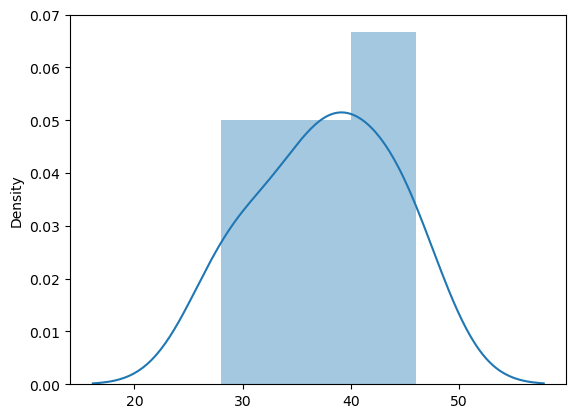

In [19]:
sns.distplot(subj1)

<AxesSubplot:ylabel='Density'>

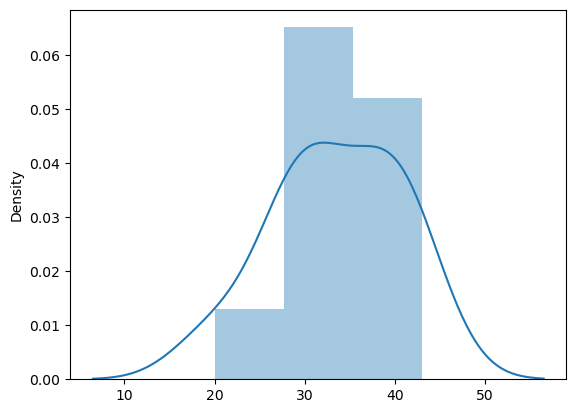

In [20]:
sns.distplot(subj2)

In [21]:
t_stat, p_val=stats.ttest_ind(subj1,subj2)
t_stat, p_val

(1.365908039538178, 0.18879292981719703)

In [22]:
#perfgorm two sample t-test with equal variances
stats.ttest_ind(subj1,subj2,equal_var=True)

Ttest_indResult(statistic=1.365908039538178, pvalue=0.18879292981719703)

# Type 1 and Type 2 error

In [23]:
effect_size=abs((subj1.mean()-subj2.mean())/(subj1.std()-subj2.std()))
sample_size=10
alpha=0.05
ratio=1.0

statistical_power=tt_ind_solve_power(effect_size=effect_size, nobs1=sample_size, alpha=alpha, ratio=1.0, alternative="two-sided")
print(statistical_power)

1.0


In [25]:
type_2_error=1-statistical_power
type_2_error

0.0